In [1]:
# Allows us to import files from the base folder
import sys
import os
# Get the parent directory of the notebook's folder
base_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(base_dir)

from quantum_error_correction_code import surface_code
from neural_network import CNNDual

from environmentCNN import Environment

import jax.numpy as jnp
from jax import random
import pickle
from time import time

key = random.key(32)

In [2]:
with open("../trained_decoders/CNNDecoder.pkl", "rb") as file:
    (
        CODE_DISTANCE,
        CONV_LAYERS,
        FC_LAYERS,
        DEFORMATION_OPTIONS,
        ERROR_PROBS,
        model_params,
    ) = pickle.load(file)

print(f"{CODE_DISTANCE = }")
print(f"{DEFORMATION_OPTIONS = }")
print(f"{ERROR_PROBS = }")
print(f"{CONV_LAYERS = }")
print(f"{FC_LAYERS = }")

CODE_DEFORMATION = jnp.zeros(CODE_DISTANCE**2, dtype=jnp.int32)

CODE_DISTANCE = 3
DEFORMATION_OPTIONS = Array([0, 1, 2, 3, 4, 5], dtype=int32)
ERROR_PROBS = Array([9.98004e-06, 9.98004e-06, 9.98004e-03], dtype=float32)
CONV_LAYERS = [(3, 2, 1), (20, 2, 1)]
FC_LAYERS = [40, 2]


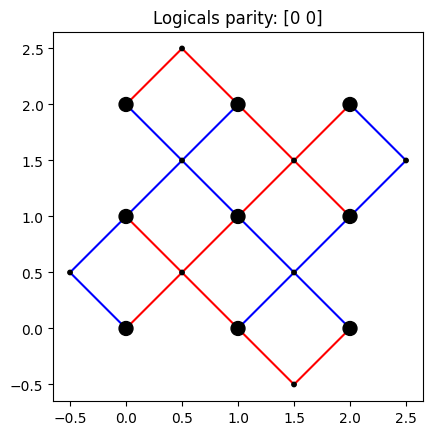

In [3]:
code = surface_code(CODE_DISTANCE)
parity_info = code.deformation_parity_info(CODE_DEFORMATION)
code.show(parity_info)

In [4]:
model = CNNDual(
    input_shape_primary=(1, CODE_DISTANCE+1, CODE_DISTANCE+1), 
    input_shape_secondary=(DEFORMATION_OPTIONS.shape[0], CODE_DISTANCE, CODE_DISTANCE), 
    conv_layers=CONV_LAYERS, 
    fc_layers=FC_LAYERS
)

In [5]:
env = Environment(
    model=model,
    model_params=model_params,
    noise_model=ERROR_PROBS,
    code=code,
    shots=1_000_000
)

In [6]:
state, score, key = env.reset(key)

In [7]:
time_limit = 10
sample_count = 0
t0 = time()
while time() - t0 < time_limit:
    state, score, key = env.reset(key)
    sample_count = sample_count + 1
print(f"Average execution time = {(time()-t0)/sample_count/env.shots*1E6:.3f}s per 1M shots ({sample_count} samples)")

Average execution time = 0.504s per 1M shots (21 samples)


In [8]:
scores = []
for i in range(100):
    state, score, key = env.reset(key)
    scores.append(score)

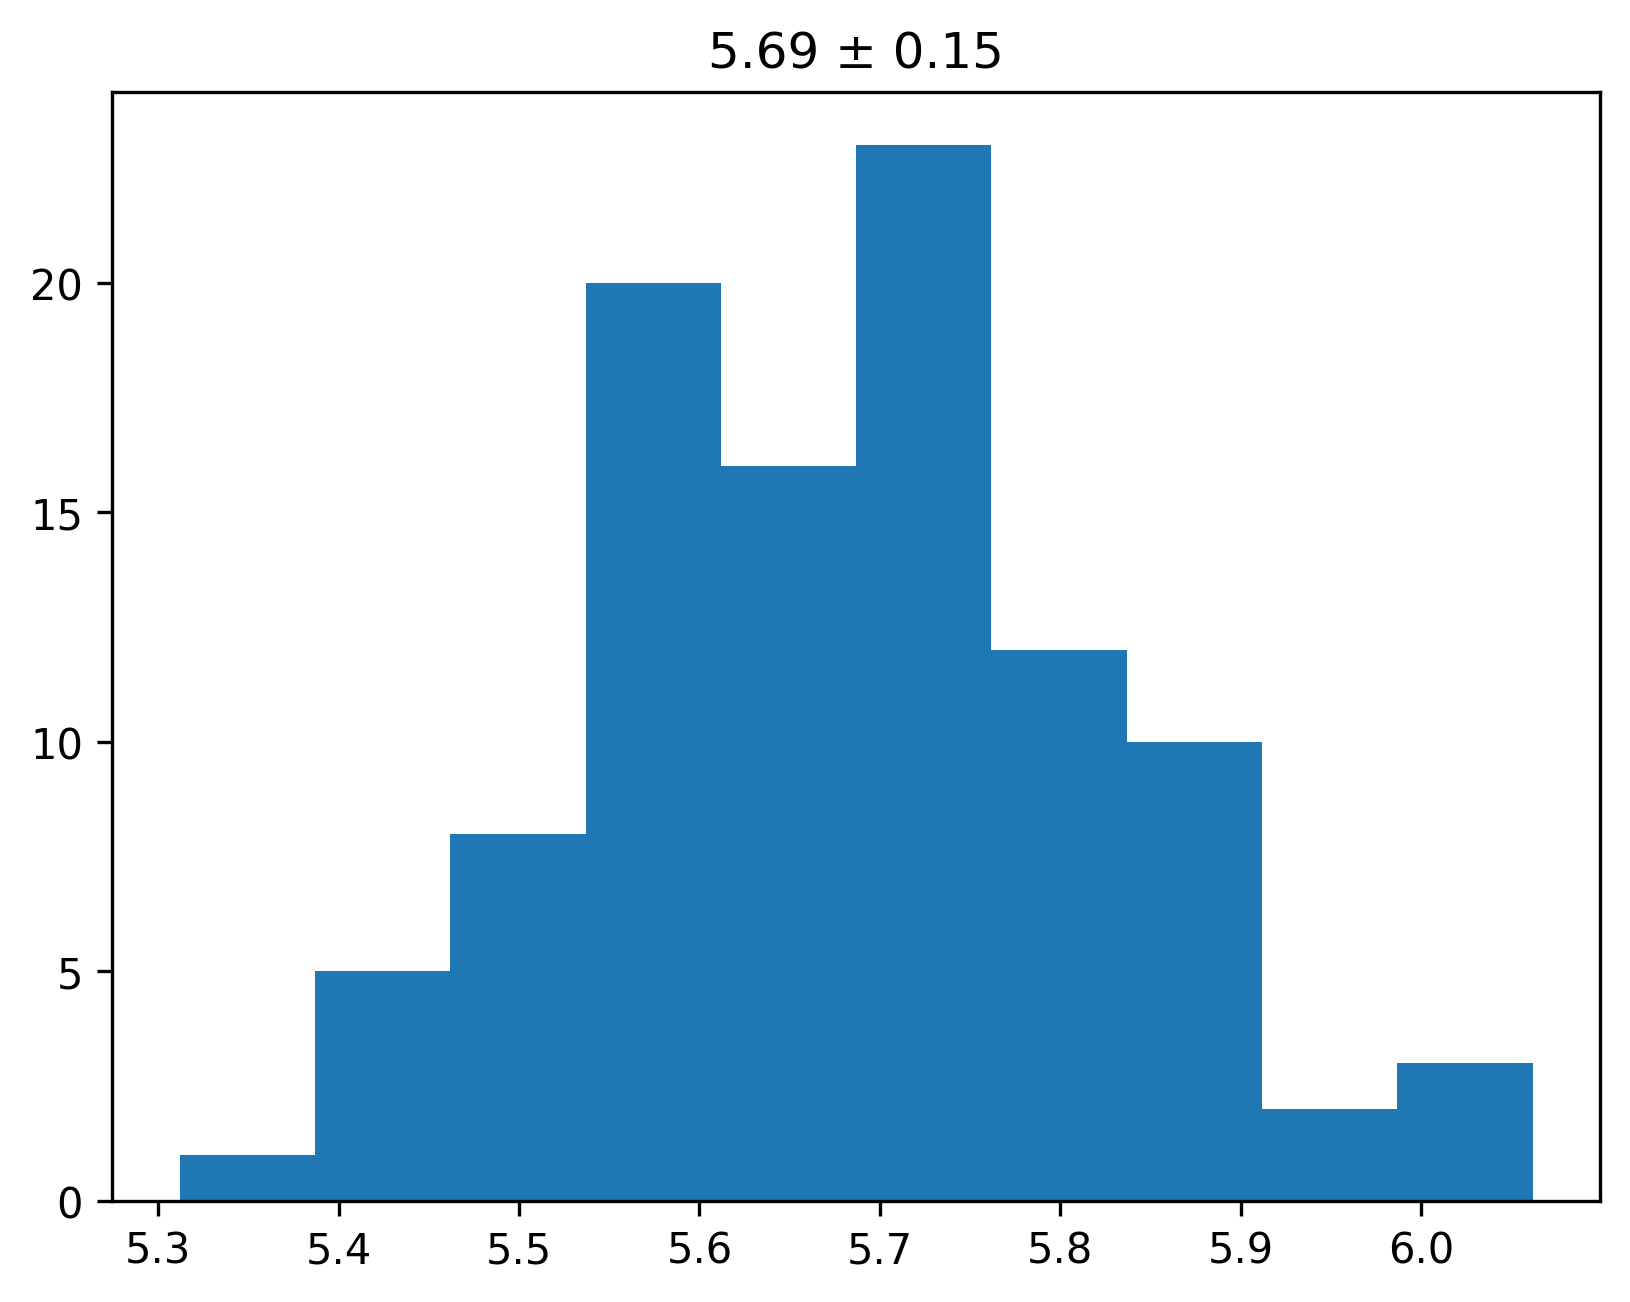

In [9]:
import matplotlib.pyplot as plt

x = jnp.array(scores)

plt.figure(dpi=300)
plt.title(f"{x.mean():.2f} ± {x.std():.2f}")
plt.hist(x)
plt.show()